In [1]:
import os
os.chdir('/workspace')
from dataset import CustomDataset
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [8]:
dt = CustomDataset(root_path='/data/BeGAN-circuit-benchmarks',
                selected_folders=['nangate45/set1_numpy','nangate45/set1_numpy'],
                csv_path='./csv/total.csv'
                )

File paths loaded from ./csv/total.csv


In [ ]:
a,b,c = dt.__getitem__(1)[0].numpy()

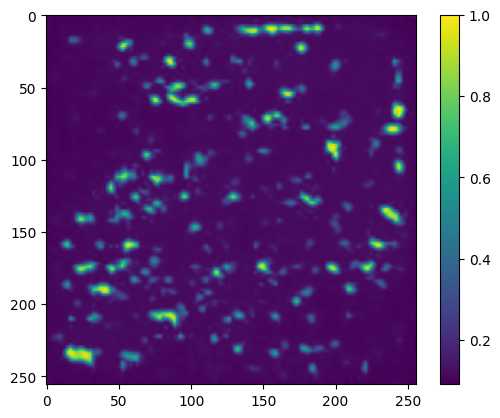

### Interpolation

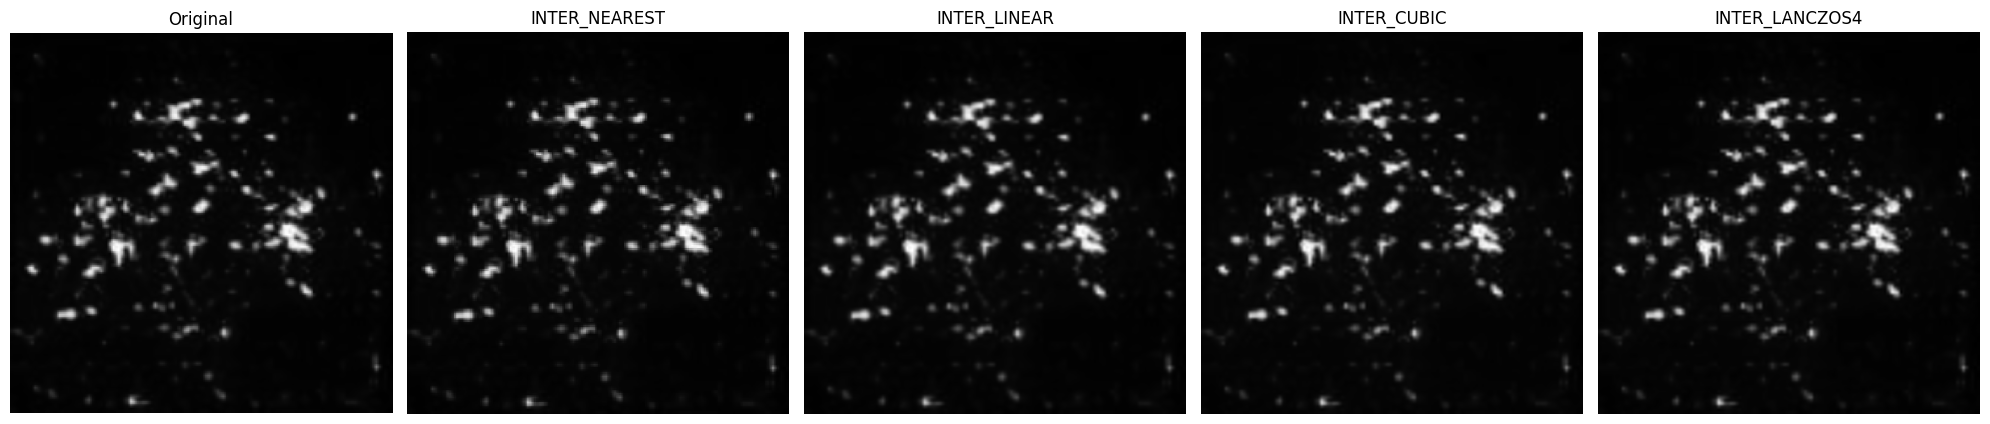

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def resize_image(image, size, interpolation):
    return cv2.resize(image, size, interpolation=interpolation)

def compare_interpolations(image_path, target_size=(512, 512)):
    # 원본 이미지 읽기
    # original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    original = np.load(image_path)
    
    # 다양한 보간법 적용
    methods = [
        ("INTER_NEAREST", cv2.INTER_NEAREST),
        ("INTER_LINEAR", cv2.INTER_LINEAR),
        ("INTER_CUBIC", cv2.INTER_CUBIC),
        ("INTER_LANCZOS4", cv2.INTER_LANCZOS4)
    ]
    
    resized_images = [resize_image(original, target_size, method[1]) for method in methods]
    
    # 결과 시각화
    plt.figure(figsize=(20, 5))
    
    plt.subplot(151)
    plt.imshow(original, cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    for i, (name, _) in enumerate(methods):
        plt.subplot(151 + i + 1)
        plt.imshow(resized_images[i], cmap='gray')
        plt.title(name)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 예시 사용
root = '/data/BeGAN-circuit-benchmarks/nangate45/set1_numpy/data'
name = 'BeGAN_0992_current.npy'
path = os.path.join(root,name)
compare_interpolations(path)

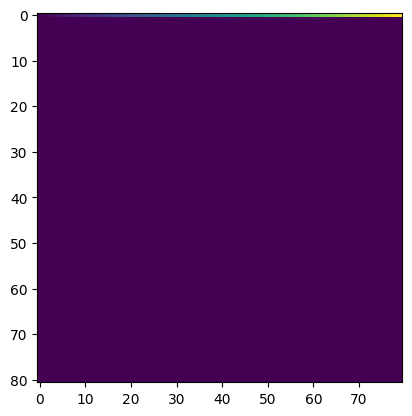

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


a = pd.read_csv('ex.csv',header=None)
a = a.to_numpy()

plt.imshow(a)
